In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_deliveries = pd.read_csv('./ipl/deliveries.csv')
df_deliveries.head()
df_matches = pd.read_csv('./ipl/matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df_matchwise_run = df_deliveries.groupby(by='match_id').sum().reset_index()[['match_id', 'total_runs']]
df_matchwise_run

,match_id,total_runs
0,1,379
1,2,371
2,3,367
3,4,327
4,5,299
...,...,...
631,632,277
632,633,317
633,634,302
634,635,325


In [4]:
df_id = df_matches[['id', 'season']]
df_id.rename(columns={'id':'match_id'}, inplace=True)
df_id.head()

C:\Users\AnupaM\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,match_id,season
0,1,2017
1,2,2017
2,3,2017
3,4,2017
4,5,2017


In [5]:
df_data = pd.merge(df_matchwise_run, df_id, how='inner', on='match_id')
df_data

,match_id,total_runs,season
0,1,379,2017
1,2,371,2017
2,3,367,2017
3,4,327,2017
4,5,299,2017
...,...,...,...
631,632,277,2016
632,633,317,2016
633,634,302,2016
634,635,325,2016


In [6]:
df_data.drop(['match_id'], inplace=True, axis=1)

In [7]:
df_data = df_data.groupby(by='season').mean().reset_index()
df_data.total_runs = round(df_data.total_runs / 2).astype(int)
df_data.head()

,season,total_runs
0,2008,155
1,2009,143
2,2010,157
3,2011,145
4,2012,152


In [8]:
df_data.rename(columns={'total_runs':'average'}, inplace=True)
df_data

,season,average
0,2008,155
1,2009,143
2,2010,157
3,2011,145
4,2012,152
5,2013,149
6,2014,158
7,2015,156
8,2016,157
9,2017,159


([<matplotlib.axis.XTick at 0x1568c9c07c8>,
 <a list of 10 Text xticklabel objects>)

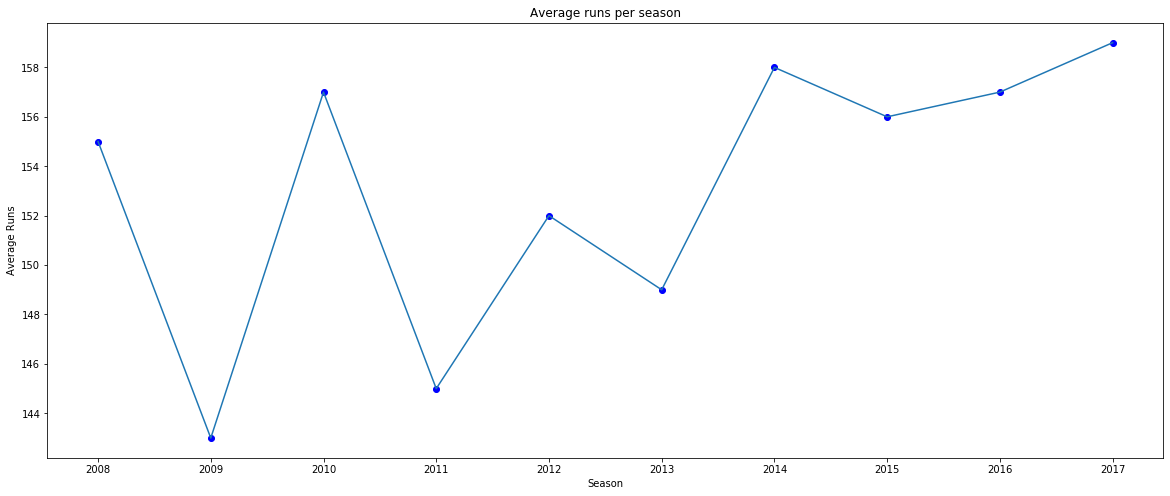

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_data.season, df_data.average, 'bo')
ax.plot(df_data.season, df_data.average)

ax.set_title('Average runs per season')
ax.set_xlabel('Season')
ax.set_ylabel('Average Runs') 
plt.xticks(np.arange(np.min(df_data.season), np.max(df_data.season)+1, step=1))